In [103]:

# Initialize Otter
import otter


grader = otter.Notebook("09-exercise-pids2024.ipynb")

# Exercise sheet 9
**Hello everyone!**

**Points: 15**

Topics of this exercise sheet are:
* P-Values
* Correlations

Please let us know if you have questions or problems! <br>
Contact us during the exercise session or on [Piazza](https://piazza.com/unibas.ch/spring2024/63982).

**Automatic Feedback**

This notebook can be automatically graded using Otter grader. To find how many points you get, simply run `grader.check_all()` from a new cell. 

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm


print(sns.__version__, type(plt), type(stats))

0.12.2 <class 'module'> <class 'module'>


![Basel](basel.jpg)

# Basel's neighborhoods
We are working with a dataset containing information about Basel and its neighborhoods. You can find it here: https://opendata.swiss/de/dataset/kennzahlen-zu-den-basler-wohnvierteln-und-landgemeinden. It's also uploaded as a csv to this folder.

In [105]:
bs = pd.read_csv("basel_neighborhoods.csv", sep=";")
bs.head()

,publikationsjahr,wohnviertel_id,wohnviertel_name,anteil_sozialhilfeempfaenger,anteil_auslaender,anteil_personen_ohne_religionszugehoerigkeit,anteil_personen_in_einpersonenhaushalten,gymnasialquote,altersquotient,anteil_sesshafte,...,baujahr_der_wohngebaeude,anteil_einfamilienhaeuser,anteil_gruenflaechen,flaeche_pro_wohnung,wohnflaeche_pro_person,vermoegenssteuer_pro_veranlagung,einkommenssteuer_pro_veranlagung,erwerbstaetigenquote,arbeitsplaetze_pro_einwohner,arbeitslosenquote
0,2015,1,Altstadt Grossbasel,0.017115,0.251426,0.517930,0.324463,0.777778,0.297921,0.328851,...,1825.400406,0.101626,0.066693,90.808059,55.739958,4297.479726,15795.731129,0.824263,4.354447,0.019072
1,2015,2,Vorstädte,0.031635,0.353328,0.532251,0.345813,0.636364,0.374726,0.279170,...,1899.097967,0.075786,0.194198,81.803421,51.200218,4902.317140,14894.945946,0.779869,4.530718,0.023471
2,2015,7,Bruderholz,0.017662,0.229827,0.458660,0.166817,0.608108,0.442465,0.427310,...,1948.410577,0.734615,0.713769,109.383218,50.067809,8585.686671,18103.101406,0.752834,0.130144,0.023127
3,2015,8,Bachletten,0.022092,0.210320,0.455482,0.224974,0.609137,0.374629,0.421825,...,1934.025590,0.561775,0.408619,93.179580,47.396467,1632.650810,11363.577884,0.790006,0.190061,0.023636
4,2015,10,Iselin,0.089462,0.360277,0.445545,0.284152,0.262357,0.260469,0.331530,...,1937.165632,0.167702,0.375125,68.638626,37.648552,425.867934,6405.308048,0.701177,0.155020,0.042679


## Question 1) P value (10 points)
Let's see if there's an answer to the following question: Did the amount of green spaces in Basel's neighborhoods increase *significantly* between 2015 and 2021? <br>

The column that measures the amount of green spaces (parks and such) is called `anteil_gruenflaechen`.

### 1a) Observed difference (1 point)
What is the observed difference between the mean of the amount of green spaces in 2015 and in 2021? <br>
Assign the mean of the amount of green spaces for the years 2015 and 2021 to the variables `mean_2015` and `mean_2021` respectively.

*Hint:* You can average over all neighborhoods

In [106]:
class Question1a:
    bs_2015 = bs[bs['publikationsjahr'] == 2015]
    bs_2021 = bs[bs['publikationsjahr'] == 2021]
    
    mean_2015 = bs_2015['anteil_gruenflaechen'].mean()
    mean_2021 = bs_2021['anteil_gruenflaechen'].mean()
    
    print(mean_2021 - mean_2015)

0.010221135919047608


In [107]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b) Artificial variables (3 points)
Let us make a new dataframe called: 
- `neighborhoods` 
  - This new dataframe contains the neighborhoods of Basel in a column called `wohnviertel_name.` Additionally, it should have a column called `increase_green_space` that has 
      - the number 1 if the amount of green space increased between 2015 and 2021 for this neighborhood
      - the number 0 otherwise
      
*More formally:*
$$
  \begin{equation}
    increase\_green\_space=
    \begin{cases}
      1, & \text{if}\ \text{anteil\_gruenflaechen\_2021}[x] > \text{ anteil\_gruenflaechen\_2015}[x], x \in \text { wohnviertelname}  \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}
$$
**Hints:** 
- Spread the data into two new dataframes: `bs_2021` and `bs_2015`. `bs_2021` will also be reused in this exercise sheet's last exercise.
- Create from `bs_2021` and `bs_2015` a merged dataframe on the column `wohnviertel_name` and use the `suffixes=(2021,2015)` option 

In [108]:
def test_increase(num_after: pd.Series, num_before: pd.Series):
    return 1 if num_after - num_before > 0 else 0


class Question1b:
    bs_2021 = Question1a.bs_2021[['wohnviertel_name', 'anteil_gruenflaechen']]
    bs_2015 = Question1a.bs_2015[['wohnviertel_name', 'anteil_gruenflaechen']]
    neighborhoods = pd.merge(
        bs_2021,
        bs_2015,
        on='wohnviertel_name',
        suffixes=(2021, 2015)
    )
    neighborhoods['increase_green_space'] = neighborhoods.apply(
        lambda x: test_increase(
            x['anteil_gruenflaechen2021'],
            x['anteil_gruenflaechen2015']
        ),
        axis=1
    )


Question1b.neighborhoods

,wohnviertel_name,anteil_gruenflaechen2021,anteil_gruenflaechen2015,increase_green_space
0,Altstadt Grossbasel,0.066659,0.066693,0
1,Vorstädte,0.194799,0.194198,1
2,Bachletten,0.413414,0.408619,1
3,Gotthelf,0.321409,0.325109,0
4,St. Johann,0.282184,0.273127,1
5,Hirzbrunnen,0.595905,0.587749,1
6,Rosental,0.156311,0.083872,1
7,Am Ring,0.240857,0.239018,1
8,Gundeldingen,0.176211,0.174296,1
9,Bruderholz,0.712127,0.713769,0


In [109]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c) Amount of neighborhoods with an increase in green spaces (2 points)

We want to verify if there was an increase or decrease in green spaces. For this, we work under the null hypothesis:
$$ \mathbb{P}(\text{green spaces increase}) -0.5 = 0. $$


What is the percentage of neighborhoods that had increased green spaces from 2015 to 2021? Save this decimal number (float) in the variable called `increase_2021`. <br>
This value will let us calculate the difference to our null hypothesis value since it is our $ \mathbb{P}(\text{green spaces increase})$. Assign the difference of `increase_2021` to our null hypothesis value (0.5) to the variable called `difference_null_hypothesis` (float).

In [110]:
class Question1c:
    nh = Question1b.neighborhoods
    increase_2021 = nh[nh['increase_green_space'] == 1].shape[0] / nh.shape[0]
    difference_null_hypothesis = increase_2021 - 0.5
    print(increase_2021, difference_null_hypothesis)

0.5714285714285714 0.0714285714285714


In [111]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

### 1d) Calculate the p-value (3 points)
What is the p-value for the significant difference in green space between 2015 and 2021? In other words: What is the p-value for: $$
\begin{align*}
P(|mean2021 - 0.5| > \text{observed\_difference})
\end{align*}
$$
Assign the p-value to the variable called `p_value`

*Hint:* Look at the slides from lecture 9 to find an example.

In [112]:
class Question1d:
    N = Question1c.nh.shape[0]
    t = np.sqrt(N) * Question1c.difference_null_hypothesis / 0.5
    p_value = 1 - (norm.cdf(t) - norm.cdf(-t))
    print("The p-value is: ", p_value)

The p-value is:  0.5126907602619235


In [113]:
grader.check("Question 1d")

Question 1d results: All test cases passed!

### 1e) Do we reject or fail to reject the null hypothesis based on our p value? (1 point)
Here our significance value is 0.05.

Please write your answer like this:
* If we reject the null hypothesis: null_hypothesis = "reject"
* If we can not reject the null hypothesis: null_hypothesis = "fail to reject"

(Hint: Read the question carefully and google it if you're not sure what it means)

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1e      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [114]:
class Question1e:
    null_hypothesis = "fail to reject"

In [115]:
grader.check("Question 1e")

Question 1e results:
    Question 1e - 1 result:
        ❌ Test case failed
        Error at line 11 in test Question 1e:
             assert False, "***We will grade this question only after submission, in order not to reveal the answer***"
        AssertionError: ***We will grade this question only after submission, in order not to reveal the answer***

<!-- END QUESTION -->



## Question 2) Correlation and regression (5 points)

### 2a) Plotting the correlation (2 points)
Make a scatterplot **using pandas plotting** function that shows you how income tax `einkommenssteuer_pro_veranlagung` and apartment size `flaeche_pro_wohnung` are correlated. 

Plot **for the year 2021**: 
- `einkommenssteuer_pro_veranlagung` on the *x*-axis and  
- `flaeche_pro_wohnung` on the *y*-axis.


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2a      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2     # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

<Axes: xlabel='einkommenssteuer_pro_veranlagung', ylabel='flaeche_pro_wohnung'>

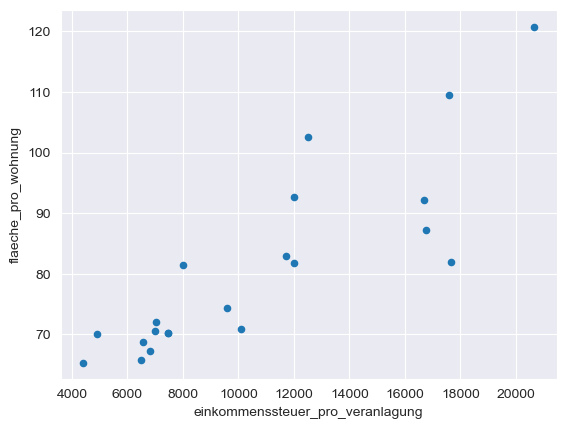

In [116]:
class Question2a:
    corr_plot = Question1a.bs_2021.plot.scatter(
        x='einkommenssteuer_pro_veranlagung',
        y='flaeche_pro_wohnung',
    )  # your scatter plot
    display(corr_plot)

In [117]:
grader.check("Question 2a")

Question 2a results: All test cases passed!

<!-- END QUESTION -->



### 2b) Correlation coefficient (1 point)
What is the correlation coefficient between income tax and apartments size in Basel for 2021? Assign this number (float) to the variable called `corr_coeff`.

*Hint:* pandas.dataframe has a function called `.corr()`

In [118]:
class Question2b:
    income_tax = Question1a.bs_2021['einkommenssteuer_pro_veranlagung']
    apartment_size = Question1a.bs_2021['flaeche_pro_wohnung']
    corr_coeff = income_tax.corr(apartment_size)
    print("correlation coefficient: ", corr_coeff)

correlation coefficient:  0.8537433905040707


In [119]:
grader.check("Question 2b")

Question 2b results: All test cases passed!

### 2c) Plot another correlation (1 point)
Make a scatter plot **using seaborn** that shows you how living space per person `wohnflaeche_pro_person` and apartment size `flaeche_pro_wohnung` are correlated **for the year 2021.**

**General Remark:** If you have to plot something on the *x and y axis, always ask yourself: Which variable is dependent on the other?* 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2c      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1    # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

<Axes: xlabel='wohnflaeche_pro_person', ylabel='flaeche_pro_wohnung'>

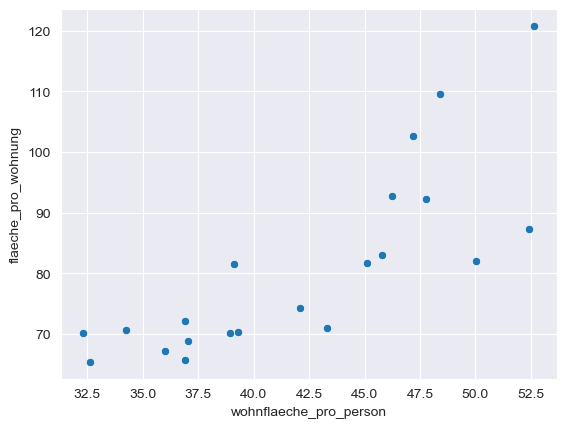

In [125]:
class Question2c:
    corr_plot = sns.scatterplot(
        Question1a.bs_2021,
        y='flaeche_pro_wohnung',
        x='wohnflaeche_pro_person'
    )
    display(corr_plot)

In [126]:
grader.check("Question 2c")

Question 2c results: All test cases passed!

<!-- END QUESTION -->



What do you notice on this plot, what kind of correlation do you observe? What could be problematic about this correlation?
Write your answer in the cell below as a comment (use #).

In [127]:
# 1. There is a positive correlation.
# 2. The correlation seems to be exponential, so a linear regression might not be the the best measure.

### 2d) Regression (1 point)

Compute the **slope** `alpha` and **intercept** `beta` of the regression line that relates income tax (predictor) and apartment_size. 

Using the data from the year 2021 `Question1b.bs_2021`. Plot the data and the regression line.


**Reminder:**$ \text{ The regression line is defined as: } f(x) = \alpha x + \beta$
$$
\begin{align*}
&\alpha = corr(x,y) \cdot \frac{\sigma_y}{\sigma_x}, &\text{ } \\
& \beta = \bar{y} - \alpha \cdot \bar{x} \\
& x = \text{tax}, y = \text{appartment size},  \\ 
& \bar{x},\text{ }\bar{y} = \text{arithmetic mean}
\end{align*}
$$ 

*Hints:*
- Make use of the following functions in pandas:  
    - `mean()`
    - `std()`
    - `corr()`

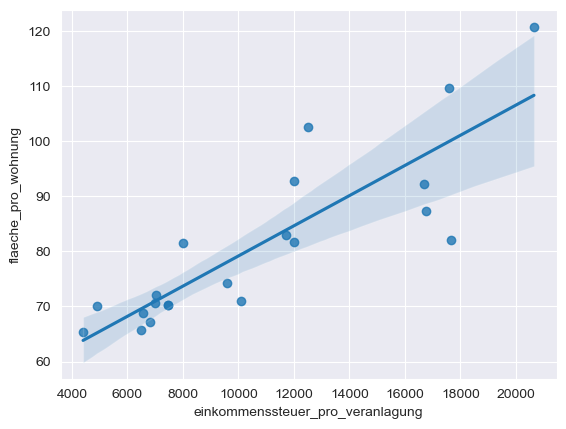

In [134]:
class Question2d:
    bs = Question1a.bs_2021
    
    mean_income_tax = bs['einkommenssteuer_pro_veranlagung'].mean()
    stddev_income_tax = bs['einkommenssteuer_pro_veranlagung'].std()
    
    mean_apartment_size = bs['flaeche_pro_wohnung'].mean()
    stddev_apartment_size = bs['flaeche_pro_wohnung'].std()
    
    corr = bs['einkommenssteuer_pro_veranlagung'].corr(
        bs['flaeche_pro_wohnung']
    )
    
    alpha = corr * stddev_apartment_size / stddev_income_tax
    beta = mean_apartment_size - (alpha * mean_income_tax)
    
    sns.regplot(
        bs,
        x='einkommenssteuer_pro_veranlagung',
        y='flaeche_pro_wohnung'
    )

In [135]:
grader.check("Question 2d")

Question 2d results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [136]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 1d results: All test cases passed!

Question 1e results:
    Question 1e - 1 result:
        ❌ Test case failed
        Error at line 11 in test Question 1e:
             assert False, "***We will grade this question only after submission, in order not to reveal the answer***"
        AssertionError: ***We will grade this question only after submission, in order not to reveal the answer***

Question 2a results: All test cases passed!

Question 2b results: All test cases passed!

Question 2c results: All test cases passed!

Question 2d results: All test cases passed!